In [39]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import tensorflow as tf
import seaborn as sns
from sklearn import metrics
import sklearn
import matplotlib.pyplot as plt
import pickle
%matplotlib inline
# DATASET FROM https://www.kaggle.com/mohansacharya/graduate-admissions

In [2]:
data=pd.read_csv("admission.csv")

In [3]:
data.drop(["Serial No."],axis=1,inplace=True)

In [4]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
X=data.drop('Chance of Admit ',axis=1)
y=data["Chance of Admit "]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y.values, test_size=0.3, random_state=101)

In [8]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [23]:
predictions = model.predict(X_test)


In [24]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.040859662891438456
MSE: 0.003213103614403529
RMSE: 0.05668424485166517


In [25]:
pred_df = pd.DataFrame(y_test,columns=['Test Y'])

In [26]:
pred_df.head()

,Test Y
0,0.63
1,0.93
2,0.74
3,0.65
4,0.70


In [27]:
test_predictions = pd.Series(predictions.reshape(150,))

In [28]:
test_predictions.head()

0    0.740735
1    0.909656
2    0.808978
3    0.626007
4    0.648264
dtype: float64

In [32]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)


In [33]:
pred_df.columns = ['Test Y','Model Predictions']

In [35]:
pred_df.head()

,Test Y,Model Predictions
0,0.63,0.740735
1,0.93,0.909656
2,0.74,0.808978
3,0.65,0.626007
4,0.70,0.648264


<AxesSubplot:xlabel='Test Y', ylabel='Model Predictions'>

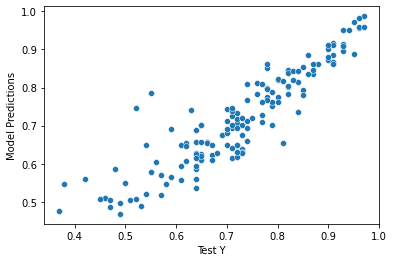

In [36]:
sns.scatterplot(x='Test Y',y='Model Predictions',data=pred_df)

In [38]:
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))